In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
## 데이터 설정

In [4]:
# 데이터 리스트 : X, Y
date = np.array([[45,3], [9,12], [15,10],[60,5],[21,15]])
date

array([[45,  3],
       [ 9, 12],
       [15, 10],
       [60,  5],
       [21, 15]])

In [18]:
## 탐색적 분석

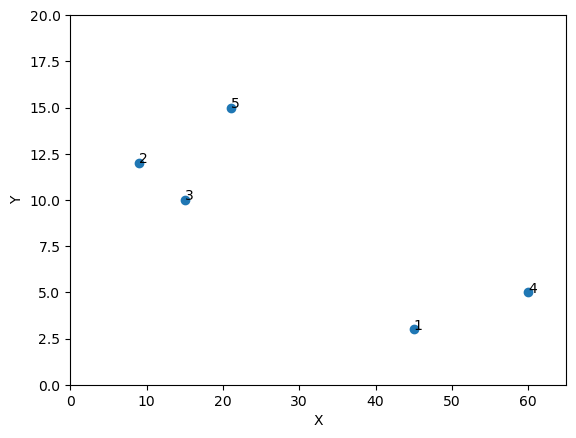

In [25]:
# 원 데이터의 X, Y의 산포도
plt.scatter(date[:, 0], date[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 65)
plt.ylim(0, 20)

#행과 열의 수
rows, columns = date.shape
# 데이터 라벨
for i in range(rows):
    plt.annotate(i+1, (date[i, 0] ,date[i, 1]))

In [ ]:
date.shape

In [20]:
rows, columns = date.shape

In [21]:
rows, columns

(5, 2)

In [22]:
## Feature Scaling

In [23]:
# 데이터 표준화(표준정규 분포화)
scaler = StandardScaler()
scaler.fit(date)
date_std = scaler.transform(date)
print(date_std)

[[ 0.77521709 -1.35526185]
 [-1.08530393  0.67763093]
 [-0.77521709  0.22587698]
 [ 1.55043418 -0.9035079 ]
 [-0.46513025  1.35526185]]


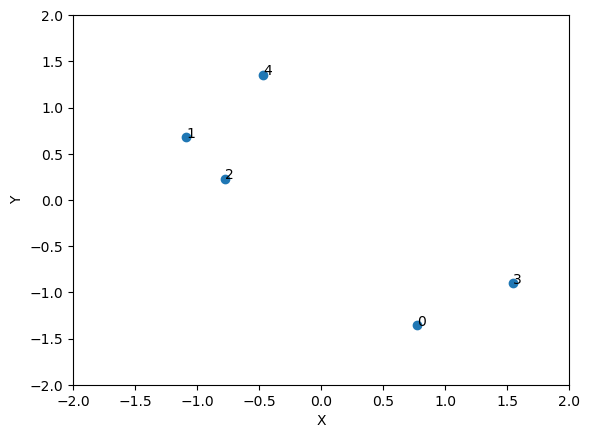

In [24]:
plt.scatter (date_std[:, 0], date_std[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

rows, columns = date_std.shape

for i in range(rows):
    plt.annotate(i, (date_std[i, 0] ,date_std[i, 1]))

In [25]:
## Clustering 수행

In [26]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(date_std)

C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto')

In [27]:
print(kmeans.labels_)

[0 1 1 0 1]


In [28]:
kmeans.cluster_centers_

array([[ 1.16282564, -1.12938488],
       [-0.77521709,  0.75292325]])

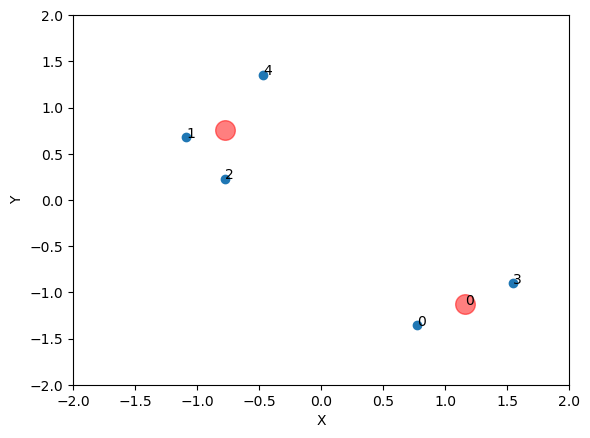

In [34]:
plt.scatter (date_std[:, 0], date_std[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

rows, columns = date_std.shape

for i in range(rows):
    plt.annotate(i, (date_std[i, 0] ,date_std[i, 1]))

# 군집 중심 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.5)

# 군집 라벨
for k in range(0, k):
    plt.annotate(k, (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

In [41]:
# 클러스터 수 별 TWSS 값
TWSS = {}

# 군집의 수 1~5까지 반복
for k in range(1, 6):
    model = KMeans(n_clusters = k)
    model.fit(date_std)
    TWSS[k] = model.inertia_


C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [42]:
TWSS

{1: 10.0,
 2: 1.2410877812663528,
 3: 0.5526393249607536,
 4: 0.15011773940345371,
 5: 0.0}

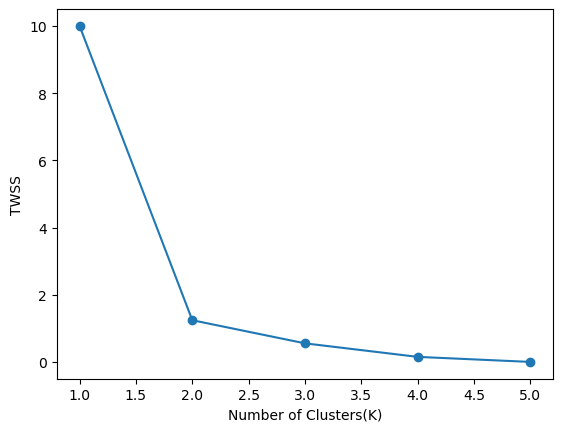

In [43]:
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()